In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from msslib.utils import *
import matplotlib.pyplot as plt
import functools as f

In [3]:
data_dir = "/home/finlay/HMT/data/VenetusA/block_samples/"
all_file_paths = listpaths(data_dir)
data_paths = sorted(list(filter(lambda x: '_data.npy' in x, all_file_paths)))
label_paths = sorted(list(filter(lambda x: '_label.npy' in x, all_file_paths)))

In [5]:
def load_data(p):
    d = np.load(p)
    w = np.reshape(d, (np.product(d.shape[:2]), d.shape[2]))
    return w

def load_label(p):
    l = np.load(p)
    return l.flatten()/10

d1 = load_data(data_paths[0])
l1 = load_label(label_paths[0])


labels, data = f.reduce(lambda x, y: (
        np.append(x[0], load_label(y[0])),
        np.concatenate((x[1], load_data(y[1])), axis=0), 
    ), zip(label_paths[1:30], data_paths[1:30]), 
    (l1, d1))


In [6]:
labels.shape

(81000,)

In [8]:
data.shape

(81000, 1681)

In [7]:
d1.shape

(2700, 1681)

In [10]:
pca = PCA(n_components=3)
lda = LinearDiscriminantAnalysis(n_components=100)

In [11]:
pca.fit(data)

PCA(copy=True, n_components=3, whiten=False)

In [12]:
lda.fit(data,labels)

/usr/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=100, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [14]:
l_d.shape

(81000, 4)

In [13]:
#p_d = pca.transform(data)
l_d = lda.transform(data)

In [33]:
p_rot = np.rot90(p_d)
l_rot = np.rot90(l_d)

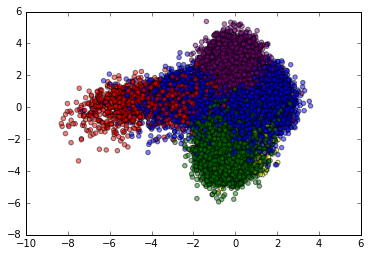

In [34]:
c = ['red','blue','green','yellow','purple']
cols = [c[int(i)] for i in labels]
plt.scatter(l_rot[0], l_rot[1],c=cols, alpha=0.5)
plt.show()

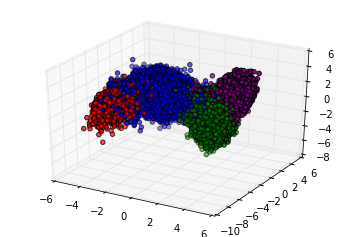

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(l_rot[2], l_rot[0], l_rot[1], zdir='z', c=cols, depthshade=True)

In [39]:
aye =np.load(data_paths[0])

In [41]:
aye.reshape((60*45, 1681))

array([[  1.72040925e-03,   2.12014538e+02,   1.30014800e+02, ...,
          2.94001716e+01,   3.86864576e+01,   5.79409085e+01],
       [  6.92488918e+00,   3.00029693e+01,   1.60980751e+01, ...,
          5.86968970e+00,   1.34868030e+01,   1.41820453e+01],
       [  1.21454643e+01,   4.61582010e+01,   2.22348723e+01, ...,
          2.40958960e+00,   1.59135311e+01,   2.75190083e+01],
       ..., 
       [  2.39978046e+00,   4.15195327e+01,   2.90202079e+01, ...,
          1.21435718e+01,   3.35650016e+01,   3.80055724e+01],
       [  2.46189569e+00,   8.15994286e+01,   2.75406698e+01, ...,
          1.46081783e+01,   2.70737371e+01,   5.10175415e+01],
       [  1.49569246e+01,   2.18393884e+02,   1.16747619e+02, ...,
          2.64393786e+01,   3.24284419e+01,   8.70246789e+01]])

In [53]:
wit = np.load('/home/finlay/HMT/data/VenetusA/LDA_block_samples/VA056RN-0057_data.npy')

In [54]:
wit.shape

(60, 45, 4)

In [15]:
41*41

1681